# Определения стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

__Цель исследования:__

Построить модель, которая умеет предсказывать стоимость автомобиля по заданным параметрам.

__Ход исследования:__

1. Загрузить,подготовить и исследовать данные.
2. Обучить разные модели.
3. Проанализировать скорость работы и качество моделей.
4. Выбрать наулилучшую модель по 3 параметрам: качество, скорость и время обучения.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Подготовка данных

### Обзор данных

Для знакомства с данными откроем файлы и выведем:
    
1. Первые 10 строк таблицы

2. Общую информацию по таблице

3. Гистограммы для всех числовых столбцов таблицы

In [2]:
try:
    df = pd.read_csv('/datasets/autos.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

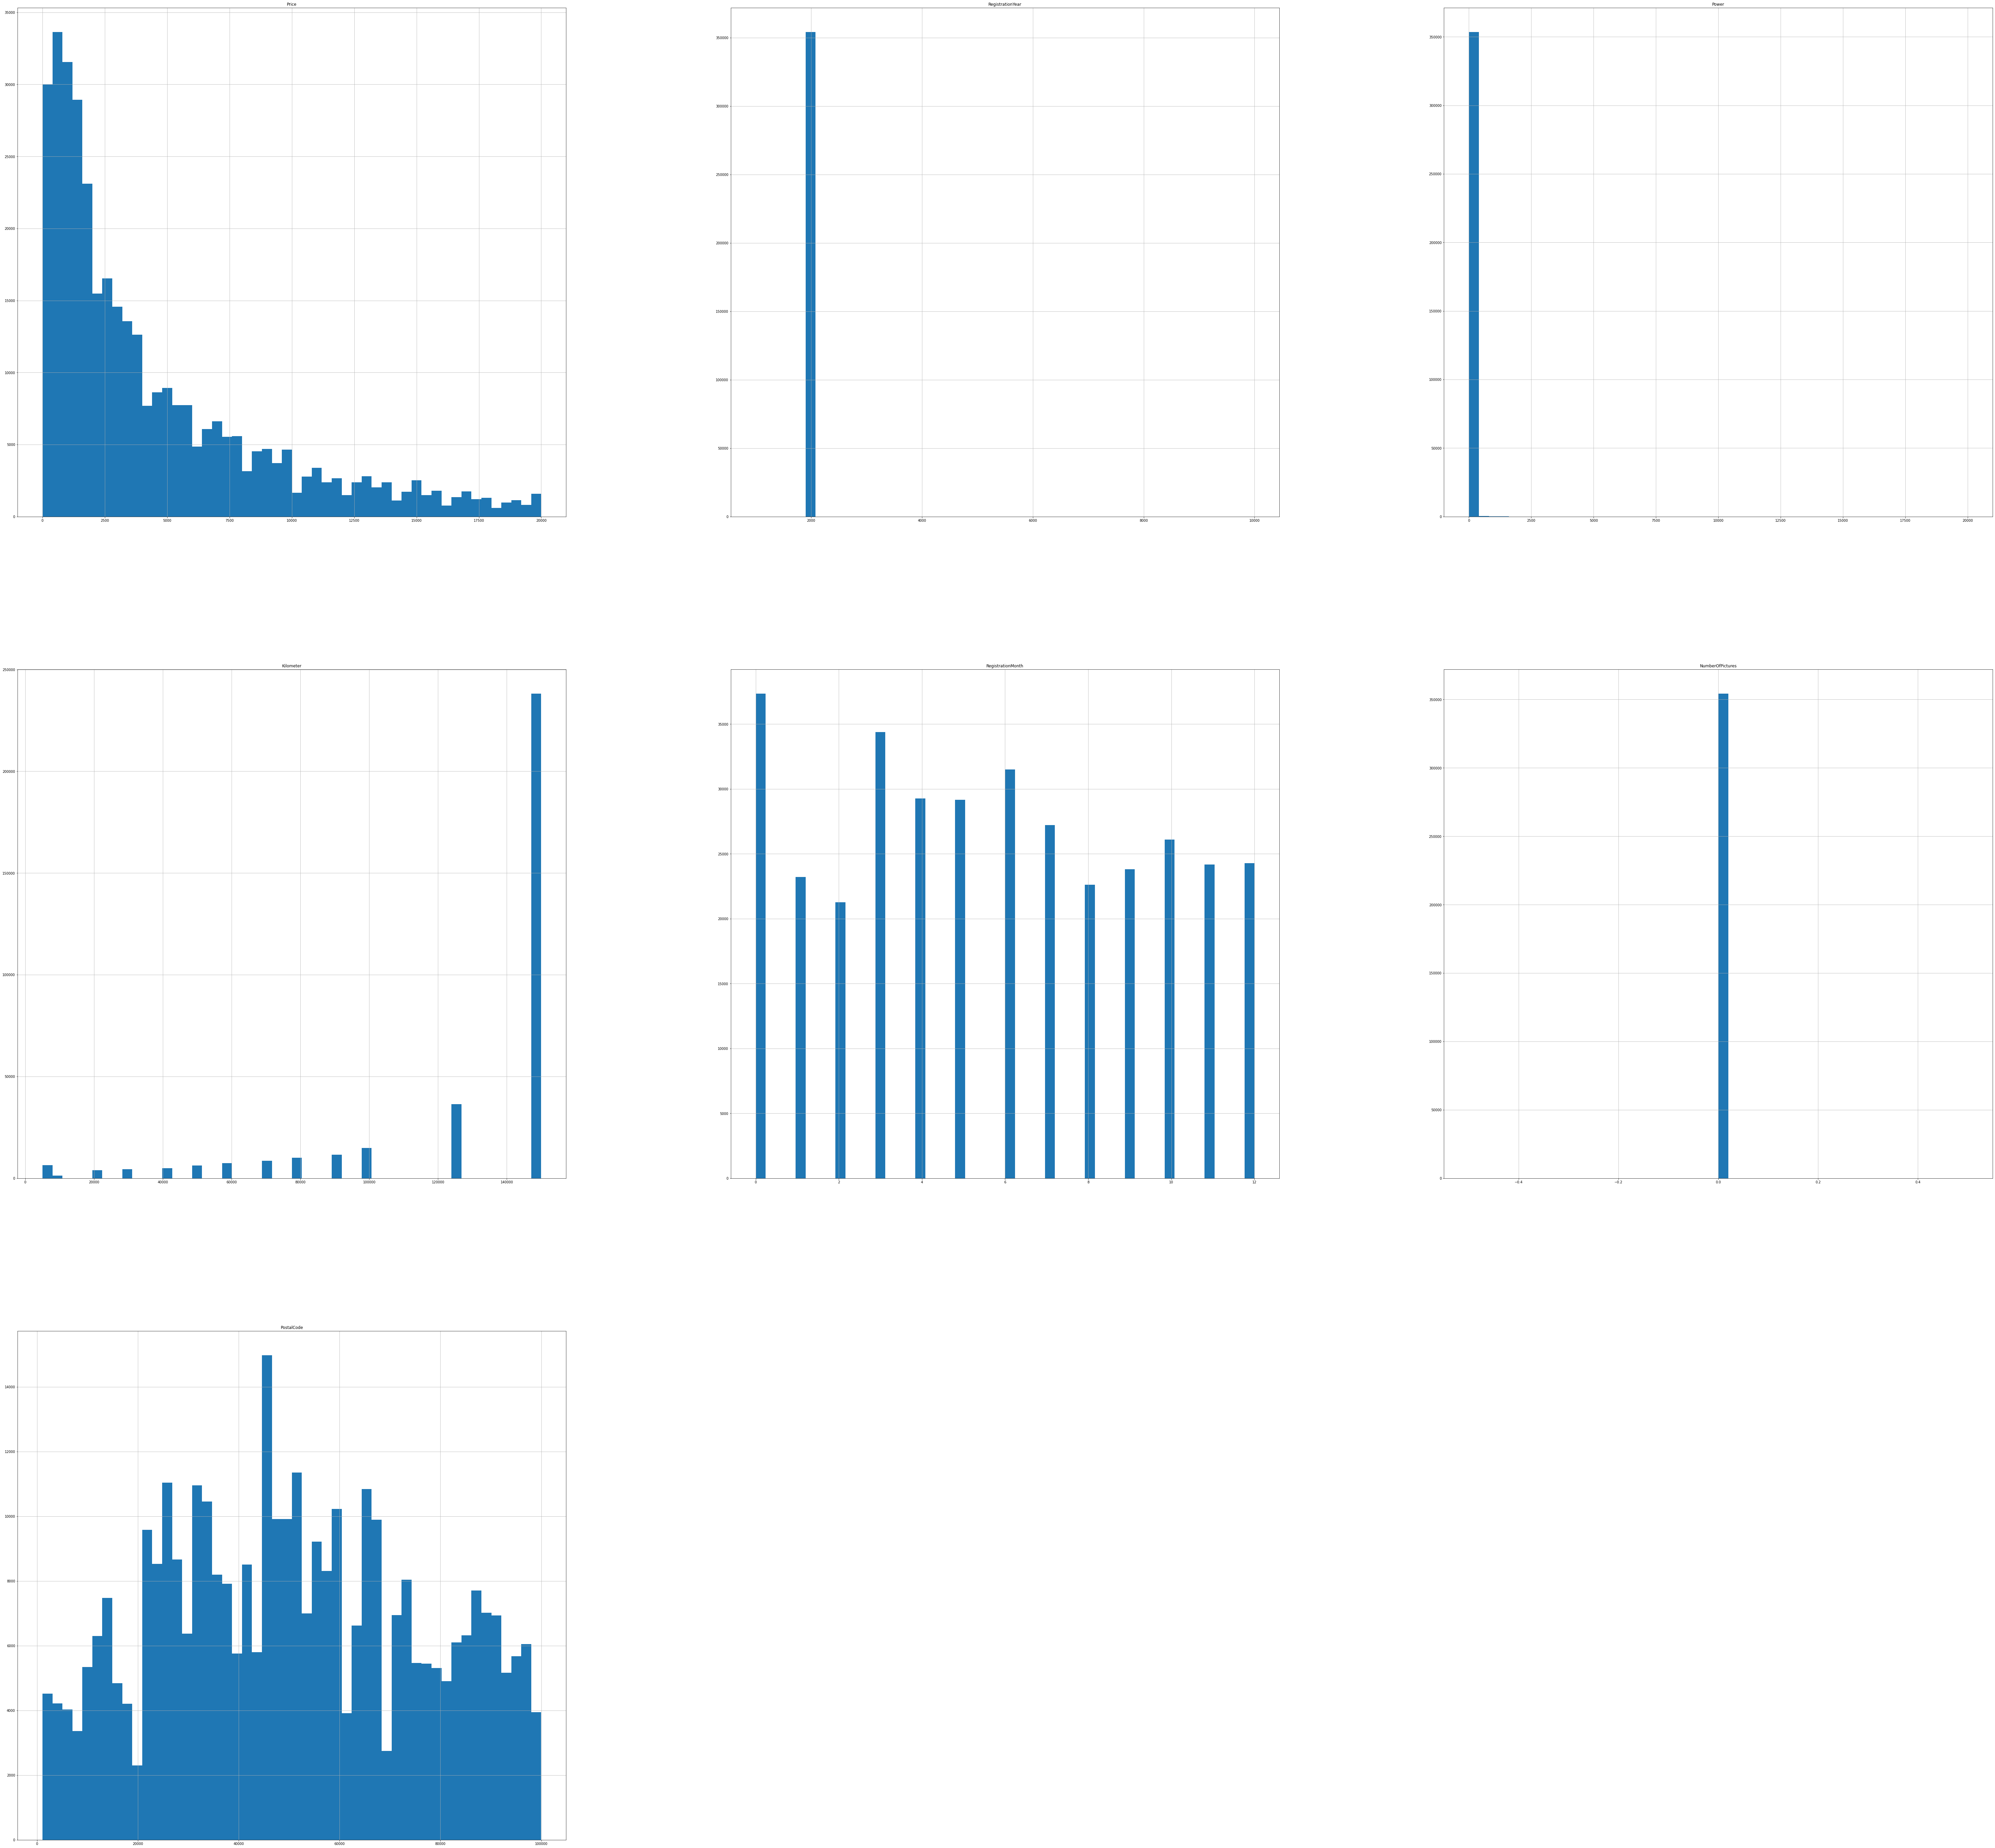

In [3]:
display(df.head(10))
display(df.describe())
display(df.info())
df.hist(bins=50, figsize=(105,100));

__Вывод:__ В датасете представлены данные. Необходимо проверить, все ли они необходимы для обучения модели, также проверить на наличие дубликатов и пропусков и привести в более привычный вид названия столбцов.

### Предобработка данных

Для начала приведем названия колонок к общему виду для удобства работы.

In [4]:
df.columns = df.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  int64 
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   kilometer           354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fuel_type           321474 non-null  object
 10  brand               354369 non-null  object
 11  repaired            283215 non-null  object
 12  date_created        354369 non-null  object
 13  number_of_pictures  354369 non-null  int64 
 14  postal_code         354369 non-null  int64 
 15  last_seen           354369 non-null  object
dtypes:

/tmp/ipykernel_301/2963138840.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]


#### Дубликаты и пропуски

Проверим данные на дубликаты и пропуски.

In [5]:
display(df.duplicated().sum())

4

Полных дубликатов 4 строки. Удалим их.

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

date_crawled              0
price                     0
vehicle_type          37490
registration_year         0
gearbox               19833
power                     0
model                 19705
kilometer                 0
registration_month        0
fuel_type             32895
brand                     0
repaired              71154
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

In [8]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
date_crawled,0.000000
price,0.000000
vehicle_type,11.000000
registration_year,0.000000
gearbox,6.000000
power,0.000000
model,6.000000
kilometer,0.000000
registration_month,0.000000
fuel_type,9.000000


В отличие от дубликатов, пропуски занимают весомое место в данных (до 20% в отдельных случаях). Разберем, в каких ситуациях возникают пропуски.

In [9]:
df[df['vehicle_type'].isna() & df['fuel_type'].isna() & df['model'].isna()&df['repaired'].isna()&df['gearbox'].isna()].count()



date_crawled          2237
price                 2237
vehicle_type             0
registration_year     2237
gearbox                  0
power                 2237
model                    0
kilometer             2237
registration_month    2237
fuel_type                0
brand                 2237
repaired                 0
date_created          2237
number_of_pictures    2237
postal_code           2237
last_seen             2237
dtype: int64

Удалим те строки, где пропуски возникают во всех колонках одновременно.

In [10]:
df = df.dropna(subset=['vehicle_type', 'fuel_type', 'model', 'repaired','gearbox'], how='all')

In [11]:
df.vehicle_type.value_counts(normalize=True)

sedan          0.288622
small          0.251929
wagon          0.205649
bus            0.090809
convertible    0.063757
coupe          0.051001
suv            0.037857
other          0.010376
Name: vehicle_type, dtype: float64

In [12]:
df.vehicle_type = df.vehicle_type.fillna('other')

In [13]:
df.model.value_counts(normalize=True)

golf                  0.087348
other                 0.072970
3er                   0.059048
polo                  0.039043
corsa                 0.037561
                        ...   
i3                    0.000024
serie_3               0.000012
rangerover            0.000012
range_rover_evoque    0.000006
serie_1               0.000006
Name: model, Length: 250, dtype: float64

Также поступим и с пропусками в столбце с моделями машин.

In [14]:
df.model = df.model.fillna('other')

In [15]:
df.fuel_type.value_counts(normalize=True)

petrol      0.672999
gasoline    0.307086
lpg         0.016518
cng         0.001758
hybrid      0.000725
other       0.000635
electric    0.000280
Name: fuel_type, dtype: float64

В случае с видами топлива сначала обратим внимание, что типы __petrol__ и __gasoline__ представляют собой один и тот же "бензин", просто в разных англоязычных странах. Соответсвенно, сведем их в одну колонку. Пропуски также заполним значением __other__.

In [16]:
df.fuel_type = df.fuel_type.replace(['gasoline'],'petrol')
df.fuel_type = df.fuel_type.fillna('other')

In [17]:
df.gearbox.value_counts(normalize=True)

manual    0.801863
auto      0.198137
Name: gearbox, dtype: float64

В колонке с типом коробки передачи указано два типа - ручная и автоматическая. Скорее всего, в пропущенных данных указаны другие типы, например вариаторная или роботизированная. Заполним пропуски типом __'other'__.

In [18]:
df.gearbox = df.gearbox.fillna('other')

In [19]:
df.repaired.value_counts(normalize=True)

no     0.872699
yes    0.127301
Name: repaired, dtype: float64

Понять, отремонтирована машина или нет, мы не можем. Заполним пропуски типом __'unknown'__

In [20]:
df.repaired = df.repaired.fillna('unknown')

In [21]:
df.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
kilometer             0
registration_month    0
fuel_type             0
brand                 0
repaired              0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64

#### Валидация значений

Проверим корректность и необходимость предоставленных данных в два этапа. Во-первых уточним данные всех колонок и, в случае необходимости, уберем лишние. Во-вторых проведем первичную проверку корректности внесенных данных в оставшихся колокнах.

In [22]:
df.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

Из представленных колонок для обучения модели не потребуются данные о количестве картинок, индексе, активности пользователя, месяце регистрации автомобиля, дате скачивания анкеты из базы, дате создания анкеты. Удалим их.

In [23]:
df = df.drop(['date_crawled', 'registration_month', 'date_created', 'number_of_pictures', 'postal_code', 'last_seen',  ], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 352128 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              352128 non-null  int64 
 1   vehicle_type       352128 non-null  object
 2   registration_year  352128 non-null  int64 
 3   gearbox            352128 non-null  object
 4   power              352128 non-null  int64 
 5   model              352128 non-null  object
 6   kilometer          352128 non-null  int64 
 7   fuel_type          352128 non-null  object
 8   brand              352128 non-null  object
 9   repaired           352128 non-null  object
dtypes: int64(4), object(6)
memory usage: 29.6+ MB


Теперь посмотрим на значения по колонкам.

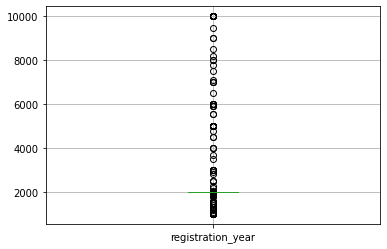

In [24]:
df.boxplot('registration_year');

Судя по первоначальным данным (колонка __last_seen__) данные предоставлены на 2016 год. Следовательно, все данные старше 2016 года некоректны, их следует исключить из выборки. Также вероятность появления эксклюзивных моделей, выпущенных ранее 2050 года, не велика и скорее исказит результат модели, чем поможет, поскольку задача - сделать модель, оценивающую общую ситуацию на рынке. Поэтому удалим и их.

In [25]:
df = df.loc[(df['registration_year'] <= 2016) & (df['registration_year'] >= 1950)]

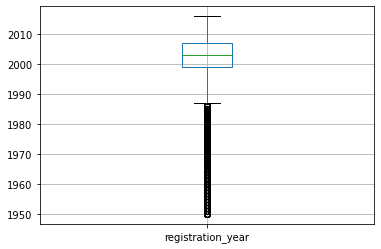

In [26]:
df.boxplot('registration_year');

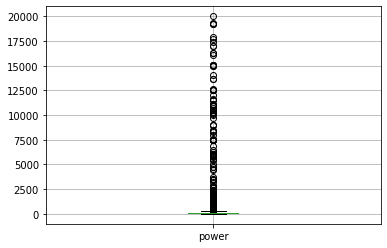

In [27]:
df.boxplot('power');

Если посмотреть на представленные на рынке стенды для замера мощности дивигателей, то понятно, что даже для самых мощных автомобилей расчет идет на мощность до 1500 л/с. При этом средняя мощность автомобилей в России по данным Росстата составляет 120 л/с. Также удалим аномалии, ограничив мощность 800 л/с.

In [28]:
df = df.loc[df['power'] <= 800]

Нулевые значения заполним медианными данными.

In [29]:
df['power'] = df['power'].replace(0, df['power'].median())

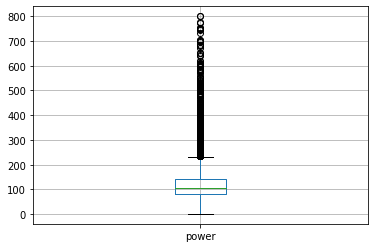

In [30]:
df.boxplot('power');

<AxesSubplot:>

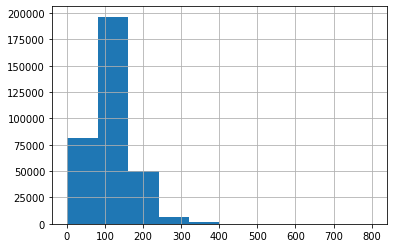

In [31]:
df.power.hist()

<AxesSubplot:>

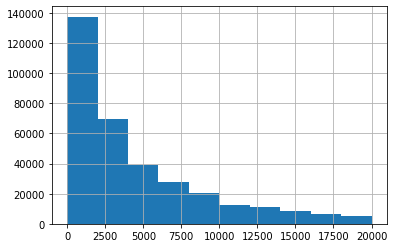

In [32]:
df.price.hist()

In [33]:
df.price.value_counts()

0       9276
500     5393
1500    5054
1200    4299
1000    4284
        ... 
3651       1
4782       1
6575       1
1858       1
8188       1
Name: price, Length: 3687, dtype: int64

Нулевые значения восстановить не представляется возможным, но их достаточно немного. Удалим их.

In [34]:
df = df.loc[df['price'] > 0]

Также в конце обновим индексы в табилце.

In [35]:
df = df.reset_index(drop=True)

In [36]:
df.head(10)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,other,1993,manual,105.0,golf,150000,petrol,volkswagen,unknown
1,18300,coupe,2011,manual,190.0,other,125000,petrol,audi,yes
2,9800,suv,2004,auto,163.0,grand,125000,petrol,jeep,unknown
3,1500,small,2001,manual,75.0,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69.0,fabia,90000,petrol,skoda,no
5,650,sedan,1995,manual,102.0,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109.0,2_reihe,150000,petrol,peugeot,no
7,14500,bus,2014,manual,125.0,c_max,30000,petrol,ford,unknown
8,999,small,1998,manual,101.0,golf,150000,other,volkswagen,unknown
9,2000,sedan,2004,manual,105.0,3_reihe,150000,petrol,mazda,no


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328009 entries, 0 to 328008
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              328009 non-null  int64  
 1   vehicle_type       328009 non-null  object 
 2   registration_year  328009 non-null  int64  
 3   gearbox            328009 non-null  object 
 4   power              328009 non-null  float64
 5   model              328009 non-null  object 
 6   kilometer          328009 non-null  int64  
 7   fuel_type          328009 non-null  object 
 8   brand              328009 non-null  object 
 9   repaired           328009 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 25.0+ MB


__Вывод:__ Мы провели предобработку данных. Были удалены дубликаты, заполнены пропуски, а также проведена обработка выбросов. В итоге мы удалили примерно 7,5% данных, что является допустимыми потерями. 

## Обучение моделей

В качестве моделей выберем следующие:
* Модель линейной регрессии
* Модель дерева решений
* Модель случайного леса
* LightGBM

Разделим выборки на тренировочные и тестовые, а затем для работы с ними выделим целевой признак и остальные признаки, а также закодируем наши данные. Применим кодировки OHE и OrdinalEncoding

In [38]:
target = df['price']
features_orig = df.drop('price', axis=1)

features_train, features_test, target_train, target_test = train_test_split(
    features_orig, target, test_size=0.25, random_state=12345)

In [39]:
features_train_ohe = pd.get_dummies(features_train, drop_first=True)
features_test_ohe = pd.get_dummies(features_test, drop_first=True)

common_columns = set(features_train_ohe.columns) & set(features_test_ohe.columns)

features_train_ohe = features_train_ohe[list(common_columns)]
features_test_ohe = features_test_ohe[list(common_columns)]


encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
cat_columns = ['vehicle_type', 'gearbox', 'fuel_type', 'brand', 'model', 'repaired']
encoder.fit(features_train[cat_columns])

features_train_ord = features_train.copy()
features_test_ord = features_test.copy()

features_train_ord[cat_columns] = encoder.transform(features_train_ord[cat_columns])
features_test_ord[cat_columns] = encoder.transform(features_test_ord[cat_columns])

```python
# порядковое кодирование
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
cat_columns = [список всех категориальных признаков]
encoder.fit(features_train[cat_columns])

features_train_ord = features_train.copy()
features_valid_ord = features_valid.copy()
features_test_ord = features_test.copy()

features_train_ord[cat_columns] = encoder.transform(features_train_ord[cat_columns])
features_valid_ord[cat_columns] = encoder.transform(features_valid_ord[cat_columns])
features_test_ord[cat_columns] = encoder.transform(features_test_ord[cat_columns])
```

### Линейная регрессия

In [40]:
%%time

model = LinearRegression()
model.fit(features_train_ohe, target_train)
predictions_train_ohe = model.predict(features_train_ohe)
rmse_lr = mean_squared_error(target_train, predictions_train_ohe)**0.5
display(rmse_lr)

2691.9593828017746

CPU times: user 32.4 s, sys: 41.5 s, total: 1min 13s
Wall time: 1min 13s


### Модель решающего дерева

In [41]:
%%time

model = DecisionTreeRegressor(random_state=12345)
param_grid = {'max_depth': [n for n in range(3, 19, 3)]}

tuning_model=RandomizedSearchCV(model, param_grid, scoring='neg_root_mean_squared_error', cv=3, verbose=3)

tuning_model.fit(features_train_ord, target_train)
display(tuning_model.best_params_)
display(tuning_model.best_score_*-1)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 1/3] END ....................................max_depth=3; total time=   0.2s
[CV 2/3] END ....................................max_depth=3; total time=   0.2s
[CV 3/3] END ....................................max_depth=3; total time=   0.1s
[CV 1/3] END ....................................max_depth=6; total time=   0.3s
[CV 2/3] END ....................................max_depth=6; total time=   0.3s
[CV 3/3] END ....................................max_depth=6; total time=   0.3s
[CV 1/3] END ....................................max_depth=9; total time=   0.4s
[CV 2/3] END ....................................max_depth=9; total time=   0.4s
[CV 3/3] END ....................................max_depth=9; total time=   0.4s
[CV 1/3] END ...................................max_depth=12; total time=   0.5s
[CV 2/3] END ...................................max_depth=12; total time=   0.6s
[CV 3/3] END ...................................max_depth=12; total time=   0.5s
[CV 1/3] END ...............

{'max_depth': 12}

1964.7261400001262

CPU times: user 8.49 s, sys: 0 ns, total: 8.49 s
Wall time: 8.59 s


### Модель случайного леса

In [42]:
%%time

model = RandomForestRegressor(random_state=12345)
param_grid = {'max_depth': [12], 'n_estimators': [100, 150, 200]}

tuning_model=RandomizedSearchCV(model, param_grid, scoring='neg_root_mean_squared_error', cv=3, verbose=3)

tuning_model.fit(features_train_ord, target_train)
display(tuning_model.best_params_)
display(tuning_model.best_score_*-1)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 1/3] END .................max_depth=12, n_estimators=100; total time=  32.3s
[CV 2/3] END .................max_depth=12, n_estimators=100; total time=  31.1s
[CV 3/3] END .................max_depth=12, n_estimators=100; total time=  33.1s
[CV 1/3] END .................max_depth=12, n_estimators=150; total time=  47.8s
[CV 2/3] END .................max_depth=12, n_estimators=150; total time=  53.0s
[CV 3/3] END .................max_depth=12, n_estimators=150; total time=  54.0s
[CV 1/3] END .................max_depth=12, n_estimators=200; total time= 1.2min
[CV 2/3] END .................max_depth=12, n_estimators=200; total time= 1.3min
[CV 3/3] END .................max_depth=12, n_estimators=200; total time= 1.2min


{'n_estimators': 200, 'max_depth': 12}

1803.9429030437434

CPU times: user 9min 17s, sys: 480 ms, total: 9min 18s
Wall time: 9min 27s


### LightGBM

Запустим модель в двух вариантах - без указания гиперпараметров и с подбором гиперпараметров

In [43]:
%%time

model = lgb.LGBMRegressor(random_state=12345)
model.fit(features_train_ord, target_train)
predictions_train = model.predict(features_train_ord)
rmse = mean_squared_error(target_train, predictions_train)**0.5
display(rmse)

1710.71601323363

CPU times: user 6min 42s, sys: 4.08 s, total: 6min 46s
Wall time: 6min 48s


In [44]:
%%time

model = lgb.LGBMRegressor(random_state=12345)

param_grid = {'num_leaves': [n for n in range(60, 181, 60)], 'learning_rate':[0.1, 0.3, 0.5]}

tuning_model=RandomizedSearchCV(model, param_grid, scoring='neg_root_mean_squared_error', cv=3, verbose=3)

tuning_model.fit(features_train_ord, target_train)
display(tuning_model.best_params_)
display(tuning_model.best_score_*-1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 1/3] END ...............learning_rate=0.1, num_leaves=60; total time= 9.8min
[CV 2/3] END ...............learning_rate=0.1, num_leaves=60; total time= 8.2min
[CV 1/3] END ..............learning_rate=0.1, num_leaves=120; total time= 2.1min
[CV 2/3] END ..............learning_rate=0.1, num_leaves=120; total time= 8.8min
[CV 3/3] END ..............learning_rate=0.1, num_leaves=120; total time=24.6min
[CV 1/3] END ..............learning_rate=0.1, num_leaves=180; total time=21.4min
[CV 2/3] END ..............learning_rate=0.1, num_leaves=180; total time= 2.0min
[CV 3/3] END ..............learning_rate=0.1, num_leaves=180; total time= 2.4min
[CV 1/3] END ...............learning_rate=0.3, num_leaves=60; total time= 3.8min
[CV 2/3] END ...............learning_rate=0.3, num_leaves=60; total time= 3.0min
[CV 3/3] END ...............learning_rate=0.3, num_leaves=60; total time= 1.1min
[CV 1/3] END ..............learning_rate=0.3, num_leaves=120; total time= 2.4min
[CV 2/3] END ..............l

{'num_leaves': 180, 'learning_rate': 0.3}

1610.6082841497057

CPU times: user 1h 38min 37s, sys: 45.2 s, total: 1h 39min 22s
Wall time: 1h 39min 55s


__Вывод:__ Было изучено 4 модели. Определены лучшие гиперпараметры и время выполнения.

## Анализ моделей

Обучим каждую модель с лучшими гиперпараметрами.

### Линейная регрессия

In [45]:
%%time

model = LinearRegression()
model.fit(features_train_ohe, target_train)

CPU times: user 18.3 s, sys: 9.65 s, total: 27.9 s
Wall time: 28 s


LinearRegression()

In [46]:
%%time

target_predict = model.predict(features_train_ohe)

CPU times: user 209 ms, sys: 204 ms, total: 413 ms
Wall time: 394 ms


In [47]:
rmse_LR = mean_squared_error(target_train, target_predict) ** 0.5

In [48]:
display(rmse_LR)

2691.9593828017746

### Модель решающего дерева

In [49]:
%%time
model = DecisionTreeRegressor(random_state=12345, max_depth = 12)
model.fit(features_train_ord, target_train)

CPU times: user 651 ms, sys: 8.04 ms, total: 659 ms
Wall time: 658 ms


DecisionTreeRegressor(max_depth=12, random_state=12345)

In [50]:
%%time
target_predict = model.predict(features_train_ord)

CPU times: user 40.2 ms, sys: 80 µs, total: 40.3 ms
Wall time: 38.6 ms


In [51]:
rmse_DT_18 = mean_squared_error(target_train, target_predict) ** 0.5

In [52]:
display(rmse_DT_18)

1750.5540949220929

### Модель случайного леса

In [53]:
%%time

model = RandomForestRegressor(random_state=12345, n_estimators=200, max_depth=12)
model.fit(features_train_ord, target_train)

CPU times: user 1min 22s, sys: 387 ms, total: 1min 22s
Wall time: 1min 22s


RandomForestRegressor(max_depth=12, n_estimators=200, random_state=12345)

In [54]:
%%time
target_predict = model.predict(features_train_ord)

CPU times: user 5.91 s, sys: 18.2 ms, total: 5.93 s
Wall time: 5.94 s


In [55]:
rmse_RF = mean_squared_error(target_train, target_predict) ** 0.5

In [56]:
display(rmse_RF)

1649.122840290263

### LightGBM

In [57]:
%%time
model = lgb.LGBMRegressor(learning_rate=0.3, num_leaves=180, random_state=12345)
model.fit(features_train_ord, target_train)

CPU times: user 13.7 s, sys: 84.8 ms, total: 13.8 s
Wall time: 13.9 s


LGBMRegressor(learning_rate=0.3, num_leaves=180, random_state=12345)

In [58]:
%%time
target_predict = model.predict(features_train_ord)

CPU times: user 2.19 s, sys: 6.25 ms, total: 2.2 s
Wall time: 2.2 s


In [59]:
rmse_LGBMR = mean_squared_error(target_train, target_predict) ** 0.5

In [60]:
display(rmse_LGBMR)

1359.8479312555783

__Вывод:__ 

In [62]:
models = pd.DataFrame({'model': 
                           ['LinearRegression', 'DecisionTree', 'RandomForest', 'LightGBM'],
                           'CPU-times learning': ['27.9 s', '659 ms', '1min 22s', '13.8 s'],
                           'Wall time learning': ['28 s', '658 ms', '1min 22s', '13.9 s'],
                           'CPU-times prediction': ['413 ms', '40.3 ms', '5.93 s', '2.2 s'],
                           'Wall time prediction': ['394 ms', '38.6 ms', '5.94 s', '2.2 s'],
                           'RMSE': [rmse_LR, rmse_DT_18, rmse_RF, rmse_LGBMR]
                          })
models

,model,CPU-times learning,Wall time learning,CPU-times prediction,Wall time prediction,RMSE
0,LinearRegression,27.9 s,28 s,413 ms,394 ms,2691.959383
1,DecisionTree,659 ms,658 ms,40.3 ms,38.6 ms,1750.554095
2,RandomForest,1min 22s,1min 22s,5.93 s,5.94 s,1649.122840
3,LightGBM,13.8 s,13.9 s,2.2 s,2.2 s,1359.847931


Лучшие результаты показывает модель LightGBM. Время обучения лучше только у модели Решающего дерева, но с заметной потерей качества результатов.

## Тестирование лучшей модели

Проведем тестирование лучшей модели.

In [63]:
model = lgb.LGBMRegressor(learning_rate=0.3, num_leaves=120, random_state=12345)
model.fit(features_train_ord, target_train)

target_predict = model.predict(features_test_ord)

rmse_LGBMR = mean_squared_error(target_test, target_predict) ** 0.5
display(rmse_LGBMR)

1590.7893739323029

Результат модели на тестовых данных достаточно хороший. Модель можно рекомендовать заказчику.

## Общий вывод

Для анализа были предоставлены данные с более 350 тыс. строк, размещенных в 16 столбцах. Названия столбцов были переведены в нижний регистры, были удалены дубликаты, проанализированны и исправлены пропуски данных, также удалены дубликаты.

Для модели линейной регрессии категориальные значения столбцов были переведены в количественные. Для моделец решающего дерева и случайного леса применялось порядковое кодирование. Были обучены 4 разные модели. При подборе гиперпараметров выяснилось, что модель LightGBM дает лучшие значения rmse.

При анализе поведения моделей было обнаружено, что модель LightGBM имеет приемлемую скорость обучения и предсказания и при этом самую низкую RMSE из всех моделей: на тестовой выборке результат 1590.78.

По скорости обучения, придсказания и качества модели, модель LightGBM оказывается самой оптимальной и именно ее можно рекомендовать для дальнейшего использования.